In [47]:
# modules needed for docx file
import docx
import aspose.words as aw

import numpy as np
import sys
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline 

# tools required for tokenization & summarization
from nltk.tokenize.punkt import PunktSentenceTokenizer
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer

In [60]:
# function to read the text file
def readDoc():
    name = input('Please input a file name: ')  
    
    # if user input txt file 
    if name.lower().endswith('.txt'):
        f = open(name, 'r')
        document = f.read()
        f.close()
        return document
    # if user input a docx(word) file
    elif name.lower().endswith('.docx'):
        doc = aw.Document(name)
        doc.save("textfile.txt")
        f = open("textfile.txt", 'r')
        document = f.read()
        f.close()
        return document

In [62]:
# reading and printing length of file
document = readDoc()
print("Length of file - ", len(document))

Length of file -  189232


## Creating a list of all sentences using Tokenizer

In [56]:
def tokenize(document):
    tokenizer = PunktSentenceTokenizer()
    sentences = tokenizer.tokenize(document)
    return sentences

In [57]:
sentences = tokenize(document)

In [58]:

print('The size of the list "sentences" is: {}'.format(len(sentences)))

The size of the list "sentences" is: 3024


### creating T-D matrix

In [59]:
feature_count_vector = CountVectorizer()
fcv_matrix = feature_count_vector.fit_transform(sentences)

In [16]:
print(feature_count_vector.get_feature_names())
print(fcv_matrix.toarray())

['aback', 'abandoned', 'abject', 'able', 'abnormal', 'about', 'above', 'abroad', 'abrupt', 'abruptly', 'absolutely', 'absorb', 'absorbed', 'absorbs', 'abstraction', 'absurd', 'absurdity', 'absurdly', 'abuse', 'accentuated', 'accept', 'accepted', 'accident', 'accidental', 'accidents', 'accommodation', 'accompanied', 'accomplished', 'accord', 'accordance', 'according', 'account', 'accounting', 'aces', 'acid', 'acknowledgment', 'across', 'act', 'acted', 'acting', 'action', 'active', 'actually', 'acute', 'added', 'adderdean', 'addition', 'addressed', 'adjoining', 'adjusted', 'admiring', 'admit', 'admitted', 'adolescents', 'adorned', 'advance', 'advanced', 'advances', 'advancing', 'advantage', 'advantages', 'adventure', 'adventurous', 'adverse', 'advice', 'advisability', 'adye', 'aerial', 'affair', 'affairs', 'affected', 'afford', 'afire', 'afraid', 'after', 'afternoon', 'afterwards', 'again', 'against', 'age', 'agency', 'aggressive', 'aggressively', 'agitated', 'agitation', 'ago', 'agoing'

c:\Users\suraj\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### Normalizing the fcv_matrix (TD matrix) using TF-IDF (Term Frequency - Inverse Document Frequency)

In [18]:
normalized_fcv_matrix = TfidfTransformer().fit_transform(fcv_matrix)
print(normalized_fcv_matrix.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [44]:
print(normalized_fcv_matrix.T.toarray)
result_graph = normalized_fcv_matrix * normalized_fcv_matrix.T
result_graph

<bound method _cs_matrix.toarray of <4723x3022 sparse matrix of type '<class 'numpy.float64'>'
	with 29459 stored elements in Compressed Sparse Column format>>


<3022x3022 sparse matrix of type '<class 'numpy.float64'>'
	with 3453882 stored elements in Compressed Sparse Row format>

C:\Users\suraj\AppData\Local\Temp\ipykernel_7788\2053994653.py:1: DeprecationWarning: 

The scipy.sparse array containers will be used instead of matrices
in Networkx 3.0. Use `from_scipy_sparse_array` instead.
  nx_graph = nx.from_scipy_sparse_matrix(result_graph)


edges = 1728452
vertices = 3022


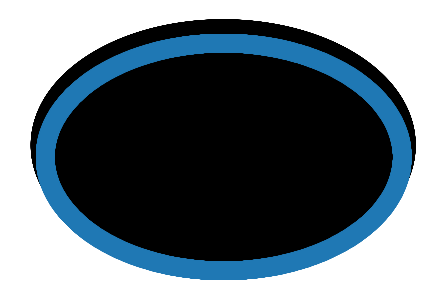

Memory used (in bytes) 48


In [45]:
nx_graph = nx.from_scipy_sparse_matrix(result_graph)
nx.draw_circular(nx_graph)
print('edges = {}'.format(nx_graph.number_of_edges()))
print('vertices = {}'.format(nx_graph.number_of_nodes()))
plt.show()
print('Memory used (in bytes) {}'.format(sys.getsizeof(nx_graph)))

## creating an array of ranks of sentences using TextRank algo

In [24]:
# ranks = dictionary
# where key=sentences and value=textrank
ranks = nx.pagerank(nx_graph)

for i in ranks:
    print(i, ranks[i])

0 0.00048013885931738604
1 0.000634910780041655
2 0.0003766755365185987
3 0.00034557391337334083
4 0.00024240495738628472
5 0.0005149829173071084
6 0.00026694966033815747
7 0.0005170054753639736
8 0.00024613891027945893
9 0.00042806730973327995
10 0.000468226991891599
11 0.0005160295559846487
12 0.0006961384755023955
13 0.00039406248736573754
14 0.00027172992112243637
15 0.00021204756141057676
16 0.00045278030545872923
17 0.0003486662536244301
18 0.0004257553925786819
19 0.00044065995949404605
20 0.0004919572730311154
21 0.00034871377084689
22 0.0003142463836513118
23 0.00029954193308728486
24 0.000525577605360483
25 0.00046714090102769874
26 0.00042081873232207407
27 0.00040708316273622524
28 0.0005905801293242095
29 0.00032868363476855805
30 0.0003971191641902692
31 0.00018643607404098434
32 0.00016048465422838286
33 0.00040884290104324184
34 0.00019677687936764447
35 0.0001525649615116869
36 0.00024520678082037123
37 0.00023922790166932357
38 0.00036770545866064274
39 0.000251094509

## Getting summarized sentences and creating a array of those

In [31]:
summary_sentence_array = sorted(((ranks[i], s) for i, s in enumerate(sentences)), reverse=True)
summary_sentence_array = np.asarray(summary_sentence_array)

In [32]:
rank_max = float(summary_sentence_array[0][0])
rank_min = float(summary_sentence_array[len(summary_sentence_array) - 1][0])
print(rank_max)
print(rank_min)

0.0008215218066119982
7.765336123246638e-05


### Normalizing summary_sentence_array to get max-score = 1 & min-score = 0

In [34]:
scaled_array = []

# Case 1 :- if all sentences have equal ranks
flag = 0
if rank_max - rank_min == 0:
    scaled_array.append(0)
    flag = 1

# Case 2 :- If the sentence has different ranks
# then we use here min-max scalling
# x' = (x-min(x)) / (max(x)-min(x))

if flag != 1:
    for i in range(0, len(summary_sentence_array)):
        scaled_array.append((float(summary_sentence_array[i][0]) - rank_min) / (rank_max - rank_min))

### Finding threshold value

In [35]:
threshold = (sum(scaled_array) / len(scaled_array)) + 0.2

In [40]:
summary_sentences = []
if len(scaled_array) > 1:
    for i in range(0, len(scaled_array)):
        if scaled_array[i] > threshold:
                summary_sentences.append(summary_sentence_array[i][1])
else:
    summary_sentences.append(summary_sentences[0][1])

In [41]:
model = summary_sentences

## Printng and creating new summarized file

In [42]:
summary = " ".join(str(x) for x in summary_sentences)
print(summary)

f = open('finalresult.txt', 'a+')
f.write('\n')
f.write(summary)
f.close

Hall went to clear away the stranger's lunch, her idea that his mouth must also have been cut or disfigured in the accident she supposed him to have suffered, was confirmed, for he was smoking a pipe, and all the time that she was in the room he never loosened the silk muffler he had wrapped round the lower part of his face to put the mouthpiece to his lips. "It's that," he said. It was quite clean, and then he remembered that the door of his room had been open when he came down from his study, and that consequently he had not touched the handle at all. Hall took his dinner in to him, he was already so absorbed in his work, pouring little drops out of the bottles into test-tubes, that he did not hear her untilshe had swept away the bulk of the straw and put the tray on the table, with some little emphasis perhaps, seeing the state that the floor was in. In a little while he was hard at work again, and the only sounds in the room were the ticking of the clock and the subdued shrillness 

<function TextIOWrapper.close()>